In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from scipy.stats import norm
import math
from matplotlib import pyplot as plt
import os

In [10]:
single_history = pd.read_csv("experiment_results/history/synth_data/results_emb_par_fit_test_with_comm_shard_num=1_Xy_N=10000_Epoch_N=10000_Nt=100_p=2_GP_version=0_part_num=50000_exp_num=0_communicate=True.csv")

mean_results0 = pd.read_csv("experiment_results/history/synth_data/results_emb_par_fit_test_with_comm_shard_num=6_Xy_N=10000_Epoch_N=100_Nt=100_p=2_GP_version=0_part_num=50000_exp_num=0_communicate=True.csv")
mean_results1 = pd.read_csv("experiment_results/history/synth_data/results_emb_par_fit_test_with_comm_shard_num=6_Xy_N=10000_Epoch_N=1000_Nt=100_p=2_GP_version=0_part_num=50000_exp_num=0_communicate=True.csv")
mean_results2 = pd.read_csv("experiment_results/history/synth_data/results_emb_par_fit_test_with_comm_shard_num=6_Xy_N=10000_Epoch_N=10000_Nt=100_p=2_GP_version=0_part_num=50000_exp_num=0_communicate=True.csv")

single_history_exp1 = pd.read_csv("experiment_results/history/synth_data/results_emb_par_fit_test_with_comm_shard_num=1_Xy_N=10000_Epoch_N=10000_Nt=100_p=2_GP_version=0_part_num=50000_exp_num=1_communicate=True.csv")

mean_results0_exp1 = pd.read_csv("experiment_results/history/synth_data/results_emb_par_fit_test_with_comm_shard_num=6_Xy_N=10000_Epoch_N=100_Nt=100_p=2_GP_version=0_part_num=50000_exp_num=1_communicate=True.csv")
mean_results1_exp1 = pd.read_csv("experiment_results/history/synth_data/results_emb_par_fit_test_with_comm_shard_num=6_Xy_N=10000_Epoch_N=1000_Nt=100_p=2_GP_version=0_part_num=50000_exp_num=1_communicate=True.csv")
mean_results2_exp1 = pd.read_csv("experiment_results/history/synth_data/results_emb_par_fit_test_with_comm_shard_num=6_Xy_N=10000_Epoch_N=10000_Nt=100_p=2_GP_version=0_part_num=50000_exp_num=1_communicate=True.csv")

single_history_exp3 = pd.read_csv("experiment_results/history/synth_data/results_emb_par_fit_test_with_comm_shard_num=1_Xy_N=10000_Epoch_N=10000_Nt=100_p=2_GP_version=0_part_num=50000_exp_num=3_communicate=True.csv")

mean_results0_exp3 = pd.read_csv("experiment_results/history/synth_data/results_emb_par_fit_test_with_comm_shard_num=6_Xy_N=10000_Epoch_N=100_Nt=100_p=2_GP_version=0_part_num=50000_exp_num=3_communicate=True.csv")
mean_results1_exp3 = pd.read_csv("experiment_results/history/synth_data/results_emb_par_fit_test_with_comm_shard_num=6_Xy_N=10000_Epoch_N=1000_Nt=100_p=2_GP_version=0_part_num=50000_exp_num=3_communicate=True.csv")
mean_results2_exp3 = pd.read_csv("experiment_results/history/synth_data/results_emb_par_fit_test_with_comm_shard_num=6_Xy_N=10000_Epoch_N=10000_Nt=100_p=2_GP_version=0_part_num=50000_exp_num=3_communicate=True.csv")

single_history_exp2 = pd.read_csv("experiment_results/history/synth_data/results_emb_par_fit_test_with_comm_shard_num=1_Xy_N=10000_Epoch_N=10000_Nt=100_p=2_GP_version=0_part_num=50000_exp_num=2_communicate=True.csv")

mean_results0_exp2 = pd.read_csv("experiment_results/history/synth_data/results_emb_par_fit_test_with_comm_shard_num=6_Xy_N=10000_Epoch_N=100_Nt=100_p=2_GP_version=0_part_num=50000_exp_num=2_communicate=True.csv")
mean_results1_exp2 = pd.read_csv("experiment_results/history/synth_data/results_emb_par_fit_test_with_comm_shard_num=6_Xy_N=10000_Epoch_N=1000_Nt=100_p=2_GP_version=0_part_num=50000_exp_num=2_communicate=True.csv")
mean_results2_exp2 = pd.read_csv("experiment_results/history/synth_data/results_emb_par_fit_test_with_comm_shard_num=6_Xy_N=10000_Epoch_N=10000_Nt=100_p=2_GP_version=0_part_num=50000_exp_num=2_communicate=True.csv")

Beta = (pd.read_csv(
"synth_data/Xy_N=10000_Epoch_N=10000_Nt=100_p=2/"+
    "GP_version=0/Beta_t_Xy_N=10000_Epoch_N=10000_Nt=100_p=2_GP_version=0.csv")[["B_0","B_1"]]
        )

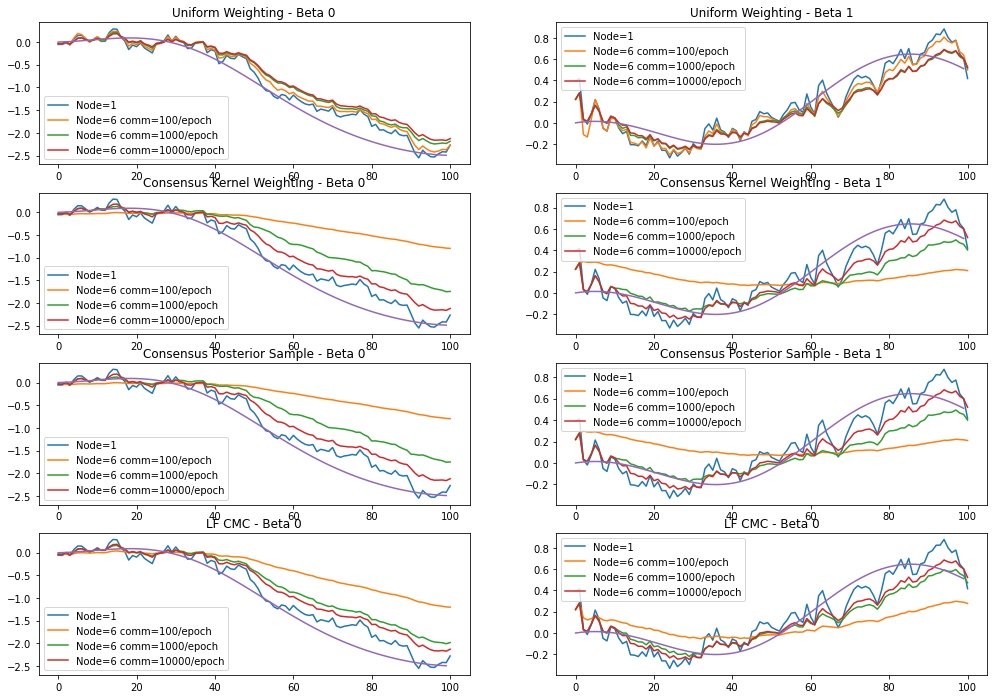

In [22]:
plt.figure(figsize=(17,12))
plt.subplot(4,2,1)
plt.title("Uniform Weighting - Beta 0")
_=plt.plot(single_history.loc[:,["0"]],label="Node=1")
_=plt.plot(mean_results0.loc[:,["0"]],label="Node=6 comm=100/epoch")
_=plt.plot(mean_results1.loc[:,["0"]],label="Node=6 comm=1000/epoch")
_=plt.plot(mean_results2.loc[:,["0"]],label="Node=6 comm=10000/epoch")
_=plt.plot(Beta.loc[:,["B_0"]])
_=plt.legend()
plt.subplot(4,2,2)
plt.title("Uniform Weighting - Beta 1")
_=plt.plot(single_history.loc[:,["1"]],label="Node=1")
_=plt.plot(mean_results0.loc[:,["1"]],label="Node=6 comm=100/epoch")
_=plt.plot(mean_results1.loc[:,["1"]],label="Node=6 comm=1000/epoch")
_=plt.plot(mean_results2.loc[:,["1"]],label="Node=6 comm=10000/epoch")
_=plt.plot(Beta.loc[:,["B_1"]])
_=plt.legend()

plt.subplot(4,2,3)
plt.title("Consensus Kernel Weighting - Beta 0")
_=plt.plot(single_history_exp1.loc[:,["0"]],label="Node=1")
_=plt.plot(mean_results0_exp1.loc[:,["0"]],label="Node=6 comm=100/epoch")
_=plt.plot(mean_results1_exp1.loc[:,["0"]],label="Node=6 comm=1000/epoch")
_=plt.plot(mean_results2_exp1.loc[:,["0"]],label="Node=6 comm=10000/epoch")
_=plt.plot(Beta.loc[:,["B_0"]])
_=plt.legend()
plt.subplot(4,2,4)
plt.title("Consensus Kernel Weighting - Beta 1")
_=plt.plot(single_history_exp1.loc[:,["1"]],label="Node=1")
_=plt.plot(mean_results0_exp1.loc[:,["1"]],label="Node=6 comm=100/epoch")
_=plt.plot(mean_results1_exp1.loc[:,["1"]],label="Node=6 comm=1000/epoch")
_=plt.plot(mean_results2_exp1.loc[:,["1"]],label="Node=6 comm=10000/epoch")
_=plt.plot(Beta.loc[:,["B_1"]])
_=plt.legend()


plt.subplot(4,2,5)
plt.title("Consensus Posterior Sample - Beta 0")
_=plt.plot(single_history_exp3.loc[:,["0"]],label="Node=1")
_=plt.plot(mean_results0_exp3.loc[:,["0"]],label="Node=6 comm=100/epoch")
_=plt.plot(mean_results1_exp3.loc[:,["0"]],label="Node=6 comm=1000/epoch")
_=plt.plot(mean_results2_exp3.loc[:,["0"]],label="Node=6 comm=10000/epoch")
_=plt.plot(Beta.loc[:,["B_0"]])
_=plt.legend()
plt.subplot(4,2,6)
plt.title("Consensus Posterior Sample - Beta 1")
_=plt.plot(single_history_exp3.loc[:,["1"]],label="Node=1")
_=plt.plot(mean_results0_exp3.loc[:,["1"]],label="Node=6 comm=100/epoch")
_=plt.plot(mean_results1_exp3.loc[:,["1"]],label="Node=6 comm=1000/epoch")
_=plt.plot(mean_results2_exp3.loc[:,["1"]],label="Node=6 comm=10000/epoch")
_=plt.plot(Beta.loc[:,["B_1"]])
_=plt.legend()

plt.subplot(4,2,7)
plt.title("LF CMC - Beta 0")
_=plt.plot(single_history_exp2.loc[:,["0"]],label="Node=1")
_=plt.plot(mean_results0_exp2.loc[:,["0"]],label="Node=6 comm=100/epoch")
_=plt.plot(mean_results1_exp2.loc[:,["0"]],label="Node=6 comm=1000/epoch")
_=plt.plot(mean_results2_exp2.loc[:,["0"]],label="Node=6 comm=10000/epoch")
_=plt.plot(Beta.loc[:,["B_0"]])
_=plt.legend()
plt.subplot(4,2,8)
plt.title("LF CMC - Beta 0")
_=plt.plot(single_history_exp2.loc[:,["1"]],label="Node=1")
_=plt.plot(mean_results0_exp2.loc[:,["1"]],label="Node=6 comm=100/epoch")
_=plt.plot(mean_results1_exp2.loc[:,["1"]],label="Node=6 comm=1000/epoch")
_=plt.plot(mean_results2_exp2.loc[:,["1"]],label="Node=6 comm=10000/epoch")
_=plt.plot(Beta.loc[:,["B_1"]])
_=plt.legend()


In [36]:
single_history = pd.read_csv("experiment_results/history/synth_data/results_emb_par_fit_test_with_comm_shard_num=1_Xy_N=400000_Epoch_N=400000_Nt=100_p=32_GP_version=0_part_num=50000_exp_num=0_communicate=True.csv")
mean_results0 = pd.read_csv("experiment_results/history/synth_data/results_emb_par_fit_test_with_comm_shard_num=6_Xy_N=400000_Epoch_N=100_Nt=100_p=32_GP_version=0_part_num=50000_exp_num=0_communicate=True.csv")
mean_results1 = pd.read_csv("experiment_results/history/synth_data/results_emb_par_fit_test_with_comm_shard_num=6_Xy_N=400000_Epoch_N=1000_Nt=100_p=32_GP_version=0_part_num=50000_exp_num=0_communicate=True.csv")
mean_results2 = pd.read_csv("experiment_results/history/synth_data/results_emb_par_fit_test_with_comm_shard_num=6_Xy_N=400000_Epoch_N=10000_Nt=100_p=32_GP_version=0_part_num=50000_exp_num=0_communicate=True.csv")
mean_results3 = pd.read_csv("experiment_results/history/synth_data/results_emb_par_fit_test_with_comm_shard_num=6_Xy_N=400000_Epoch_N=400000_Nt=100_p=32_GP_version=0_part_num=50000_exp_num=0_communicate=True.csv")

single_history_exp1 = pd.read_csv("experiment_results/history/synth_data/results_emb_par_fit_test_with_comm_shard_num=1_Xy_N=400000_Epoch_N=400000_Nt=100_p=32_GP_version=0_part_num=50000_exp_num=1_communicate=True.csv")
mean_results0_exp1 = pd.read_csv("experiment_results/history/synth_data/results_emb_par_fit_test_with_comm_shard_num=6_Xy_N=400000_Epoch_N=100_Nt=100_p=32_GP_version=0_part_num=50000_exp_num=1_communicate=True.csv")
mean_results1_exp1 = pd.read_csv("experiment_results/history/synth_data/results_emb_par_fit_test_with_comm_shard_num=6_Xy_N=400000_Epoch_N=1000_Nt=100_p=32_GP_version=0_part_num=50000_exp_num=1_communicate=True.csv")
mean_results2_exp1 = pd.read_csv("experiment_results/history/synth_data/results_emb_par_fit_test_with_comm_shard_num=6_Xy_N=400000_Epoch_N=10000_Nt=100_p=32_GP_version=0_part_num=50000_exp_num=1_communicate=True.csv")
mean_results3_exp1 = pd.read_csv("experiment_results/history/synth_data/results_emb_par_fit_test_with_comm_shard_num=6_Xy_N=400000_Epoch_N=400000_Nt=100_p=32_GP_version=0_part_num=50000_exp_num=1_communicate=True.csv")

single_history_exp2 = pd.read_csv("experiment_results/history/synth_data/results_emb_par_fit_test_with_comm_shard_num=1_Xy_N=400000_Epoch_N=400000_Nt=100_p=32_GP_version=0_part_num=50000_exp_num=2_communicate=True.csv")
mean_results0_exp2 = pd.read_csv("experiment_results/history/synth_data/results_emb_par_fit_test_with_comm_shard_num=6_Xy_N=400000_Epoch_N=100_Nt=100_p=32_GP_version=0_part_num=50000_exp_num=2_communicate=True.csv")
mean_results1_exp2 = pd.read_csv("experiment_results/history/synth_data/results_emb_par_fit_test_with_comm_shard_num=6_Xy_N=400000_Epoch_N=1000_Nt=100_p=32_GP_version=0_part_num=50000_exp_num=2_communicate=True.csv")
mean_results2_exp2 = pd.read_csv("experiment_results/history/synth_data/results_emb_par_fit_test_with_comm_shard_num=6_Xy_N=400000_Epoch_N=10000_Nt=100_p=32_GP_version=0_part_num=50000_exp_num=2_communicate=True.csv")
mean_results3_exp2 = pd.read_csv("experiment_results/history/synth_data/results_emb_par_fit_test_with_comm_shard_num=6_Xy_N=400000_Epoch_N=400000_Nt=100_p=32_GP_version=0_part_num=50000_exp_num=2_communicate=True.csv")

single_history_exp3 = pd.read_csv("experiment_results/history/synth_data/results_emb_par_fit_test_with_comm_shard_num=1_Xy_N=400000_Epoch_N=400000_Nt=100_p=32_GP_version=0_part_num=50000_exp_num=3_communicate=True.csv")
mean_results0_exp3 = pd.read_csv("experiment_results/history/synth_data/results_emb_par_fit_test_with_comm_shard_num=6_Xy_N=400000_Epoch_N=100_Nt=100_p=32_GP_version=0_part_num=50000_exp_num=3_communicate=True.csv")
mean_results1_exp3 = pd.read_csv("experiment_results/history/synth_data/results_emb_par_fit_test_with_comm_shard_num=6_Xy_N=400000_Epoch_N=1000_Nt=100_p=32_GP_version=0_part_num=50000_exp_num=3_communicate=True.csv")
mean_results2_exp3 = pd.read_csv("experiment_results/history/synth_data/results_emb_par_fit_test_with_comm_shard_num=6_Xy_N=400000_Epoch_N=10000_Nt=100_p=32_GP_version=0_part_num=50000_exp_num=3_communicate=True.csv")
mean_results3_exp3 = pd.read_csv("experiment_results/history/synth_data/results_emb_par_fit_test_with_comm_shard_num=6_Xy_N=400000_Epoch_N=400000_Nt=100_p=32_GP_version=0_part_num=50000_exp_num=3_communicate=True.csv")

Beta = (pd.read_csv(
"synth_data/Xy_N=400000_Epoch_N=2000_Nt=100_p=32/"+
    "GP_version=0/Beta_t_Xy_N=400000_Epoch_N=2000_Nt=100_p=32_GP_version=0.csv")[["B_0","B_1"]]
        )

FileNotFoundError: [Errno 2] File experiment_results/history/synth_data/results_emb_par_fit_test_with_comm_shard_num=6_Xy_N=400000_Epoch_N=1000_Nt=100_p=32_GP_version=0_part_num=50000_exp_num=3_communicate=True.csv does not exist: 'experiment_results/history/synth_data/results_emb_par_fit_test_with_comm_shard_num=6_Xy_N=400000_Epoch_N=1000_Nt=100_p=32_GP_version=0_part_num=50000_exp_num=3_communicate=True.csv'

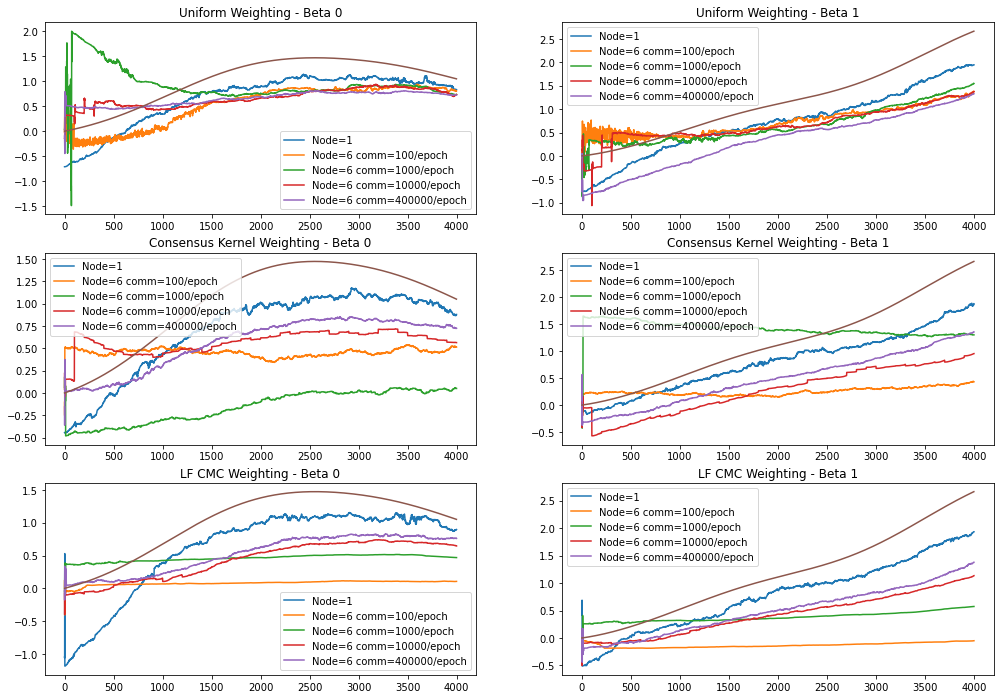

In [35]:
plt.figure(figsize=(17,12))
plt.subplot(3,2,1)
plt.title("Uniform Weighting - Beta 0")
_=plt.plot(single_history.loc[:,["0"]],label="Node=1")
_=plt.plot(mean_results0.loc[:,["0"]],label="Node=6 comm=100/epoch")
_=plt.plot(mean_results1.loc[:,["0"]],label="Node=6 comm=1000/epoch")
_=plt.plot(mean_results2.loc[:,["0"]],label="Node=6 comm=10000/epoch")
_=plt.plot(mean_results3.loc[:,["0"]],label="Node=6 comm=400000/epoch")

_=plt.plot(Beta.loc[:,["B_0"]])
_=plt.legend()
plt.subplot(3,2,2)
plt.title("Uniform Weighting - Beta 1")
_=plt.plot(single_history.loc[:,["1"]],label="Node=1")
_=plt.plot(mean_results0.loc[:,["1"]],label="Node=6 comm=100/epoch")
_=plt.plot(mean_results1.loc[:,["1"]],label="Node=6 comm=1000/epoch")
_=plt.plot(mean_results2.loc[:,["1"]],label="Node=6 comm=10000/epoch")
_=plt.plot(mean_results3.loc[:,["1"]],label="Node=6 comm=400000/epoch")
_=plt.plot(Beta.loc[:,["B_1"]])
_=plt.legend()

plt.subplot(3,2,3)
plt.title("Consensus Kernel Weighting - Beta 0")
_=plt.plot(single_history_exp1.loc[:,["0"]],label="Node=1")
_=plt.plot(mean_results0_exp1.loc[:,["0"]],label="Node=6 comm=100/epoch")
_=plt.plot(mean_results1_exp1.loc[:,["0"]],label="Node=6 comm=1000/epoch")
_=plt.plot(mean_results2_exp1.loc[:,["0"]],label="Node=6 comm=10000/epoch")
_=plt.plot(mean_results3_exp1.loc[:,["0"]],label="Node=6 comm=400000/epoch")

_=plt.plot(Beta.loc[:,["B_0"]])
_=plt.legend()
plt.subplot(3,2,4)
plt.title("Consensus Kernel Weighting - Beta 1")
_=plt.plot(single_history_exp1.loc[:,["1"]],label="Node=1")
_=plt.plot(mean_results0_exp1.loc[:,["1"]],label="Node=6 comm=100/epoch")
_=plt.plot(mean_results1_exp1.loc[:,["1"]],label="Node=6 comm=1000/epoch")
_=plt.plot(mean_results2_exp1.loc[:,["1"]],label="Node=6 comm=10000/epoch")
_=plt.plot(mean_results3_exp1.loc[:,["1"]],label="Node=6 comm=400000/epoch")
_=plt.plot(Beta.loc[:,["B_1"]])
_=plt.legend()

plt.subplot(3,2,5)
plt.title("LF CMC Weighting - Beta 0")
_=plt.plot(single_history_exp2.loc[:,["0"]],label="Node=1")
_=plt.plot(mean_results0_exp2.loc[:,["0"]],label="Node=6 comm=100/epoch")
_=plt.plot(mean_results1_exp2.loc[:,["0"]],label="Node=6 comm=1000/epoch")
_=plt.plot(mean_results2_exp2.loc[:,["0"]],label="Node=6 comm=10000/epoch")
_=plt.plot(mean_results3_exp2.loc[:,["0"]],label="Node=6 comm=400000/epoch")

_=plt.plot(Beta.loc[:,["B_0"]])
_=plt.legend()

plt.subplot(3,2,6)
plt.title("LF CMC Weighting - Beta 1")
_=plt.plot(single_history_exp2.loc[:,["1"]],label="Node=1")
_=plt.plot(mean_results0_exp2.loc[:,["1"]],label="Node=6 comm=100/epoch")
_=plt.plot(mean_results1_exp2.loc[:,["1"]],label="Node=6 comm=1000/epoch")
_=plt.plot(mean_results2_exp2.loc[:,["1"]],label="Node=6 comm=10000/epoch")
_=plt.plot(mean_results3_exp2.loc[:,["1"]],label="Node=6 comm=400000/epoch")
_=plt.plot(Beta.loc[:,["B_1"]])
_=plt.legend()